# Look at nonparametric stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_responses = pd.read_csv('../output/nonparam/FlexibleListenerGroups_alpha1.5scale1.csv')
df_posttest = pd.read_csv('../output/nonparam/meaningTest_FlexibleListenerGroups_alpha1.5scale1.csv')

# Remove white space from column labels
df_responses.columns = df_responses.columns.str.replace(' ', '')
df_posttest.columns = df_posttest.columns.str.replace(' ', '')

In [5]:
df_responses

,model,speakerAlpha,listenerAlpha,costWeight,discountFactor,guessingEpsilon,scalingFactor,priorAlpha,iterationNum,trialNum,speakerID,listenerID,partnerID,intendedName,speakerChoice,listenerChoice,correctProb
0,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,0,1,0,4,0,A,word2,A,-2.244925e-01
1,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,0,2,0,4,0,B,word1,B,-2.241651e-06
2,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,0,3,0,4,0,A,word2,A,-6.612938e-08
3,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,0,4,0,4,0,B,word1,B,-4.765963e-10
4,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,0,5,0,4,0,A,word2,A,-2.706830e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,3,19,3,4,3,A,word1,A,-2.029390e-02
91,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,3,20,3,4,3,B,word2,B,-7.725458e-07
92,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,3,21,3,4,3,A,word1,A,-1.037041e-08
93,FlexibleListenerGroups,5,5,0,0.9,0.01,1,1.5,3,22,3,4,3,B,word2,B,-2.653635e-09


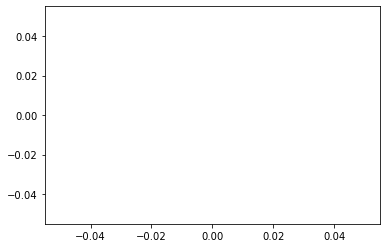

In [6]:
plt.figure()
plt.plot(df_responses.loc[(df_responses['partnerID'] == 0) & (df_responses['iterationNum'] == 13)]['correctProb'])
# plt.plot((df_responses[(df_responses['speakerID'] == 1) & (df_responses[df_responses['iterationNum'] == 14])]['correctProb'])

In [7]:
df_posttest

,model,speakerAlpha,listenerAlpha,discountFactor,guessingEpsilon,iterationNum,trialNum,speakerID,listenerID,partnerID,partner,val
0,FlexibleListenerGroups,5,5,0.9,0.01,0,1,0,4,partner0,group0,0.390875
1,FlexibleListenerGroups,5,5,0.9,0.01,0,1,0,4,partner0,group3,0.120875
2,FlexibleListenerGroups,5,5,0.9,0.01,0,1,0,4,partner0,group1,0.210875
3,FlexibleListenerGroups,5,5,0.9,0.01,0,1,0,4,partner0,group4,0.047625
4,FlexibleListenerGroups,5,5,0.9,0.01,0,1,0,4,partner0,group2,0.156000
...,...,...,...,...,...,...,...,...,...,...,...,...
5784,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group2,0.165250
5785,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group13,0.000500
5786,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group11,0.001250
5787,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group9,0.004125


Partners 0 and 2 should be in one group and partners 1 and 3 should be in one group

Partner 2 should want to be in group 0 and partners 1 and 3 should not want to be in group 0

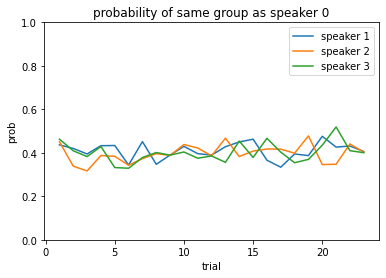

In [9]:
# Probability of partner1 being in group0 should decrease over time 

iteration_num = 3

df_p1g0 = df_posttest.loc[(df_posttest['partnerID'] == 'partner1') & (df_posttest['partner'] == 'group0') & (df_posttest['iterationNum'] == iteration_num)]
df_p2g0 = df_posttest.loc[(df_posttest['partnerID'] == 'partner2') & (df_posttest['partner'] == 'group0') & (df_posttest['iterationNum'] == iteration_num)]
df_p3g0 = df_posttest.loc[(df_posttest['partnerID'] == 'partner3') & (df_posttest['partner'] == 'group0') & (df_posttest['iterationNum'] == iteration_num)]

plt.figure()
plt.title('probability of same group as speaker 0')
plt.plot(df_p1g0['trialNum'], df_p1g0['val'], label="speaker 1")
plt.plot(df_p2g0['trialNum'], df_p2g0['val'], label="speaker 2")
plt.plot(df_p3g0['trialNum'], df_p3g0['val'], label="speaker 3")
plt.xlabel('trial')
plt.ylabel('prob')
plt.ylim([0, 1])
plt.legend()

In [10]:
df_posttest.loc[(df_posttest['partnerID'] == 'partner2') & (df_posttest['partner'] == 'group0')]['val']

33      0.396750
97      0.346375
159     0.358000
223     0.381125
283     0.424125
          ...   
5516    0.477750
5577    0.346000
5639    0.347500
5700    0.440875
5763    0.402875
Name: val, Length: 95, dtype: float64

Calculate group breakdowns over time for each partner

In [11]:
df_post_22 = df_posttest[df_posttest['iterationNum'] == iteration_num]
df_post_22

,model,speakerAlpha,listenerAlpha,discountFactor,guessingEpsilon,iterationNum,trialNum,speakerID,listenerID,partnerID,partner,val
4400,FlexibleListenerGroups,5,5,0.9,0.01,3,1,0,4,partner0,group1,0.273125
4401,FlexibleListenerGroups,5,5,0.9,0.01,3,1,0,4,partner0,group0,0.394625
4402,FlexibleListenerGroups,5,5,0.9,0.01,3,1,0,4,partner0,group2,0.141375
4403,FlexibleListenerGroups,5,5,0.9,0.01,3,1,0,4,partner0,group4,0.033500
4404,FlexibleListenerGroups,5,5,0.9,0.01,3,1,0,4,partner0,group3,0.077125
...,...,...,...,...,...,...,...,...,...,...,...,...
5784,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group2,0.165250
5785,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group13,0.000500
5786,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group11,0.001250
5787,FlexibleListenerGroups,5,5,0.9,0.01,3,23,3,4,partner3,group9,0.004125


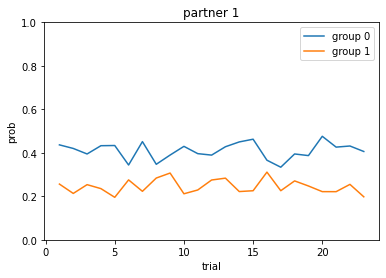

In [13]:
p1g0 = df_post_22.loc[(df_post_22['partnerID'] == 'partner1') & (df_post_22['partner'] == 'group0')]
p1g1 = df_post_22.loc[(df_post_22['partnerID'] == 'partner1') & (df_post_22['partner'] == 'group1')]

plt.figure()
plt.plot(p1g0['trialNum'], p1g0['val'], label='group 0') 
plt.plot(p1g1['trialNum'], p1g1['val'], label='group 1') 
plt.title('partner 1')
plt.xlabel('trial')
plt.ylabel('prob')
plt.ylim((0, 1))
plt.legend()
plt.show()

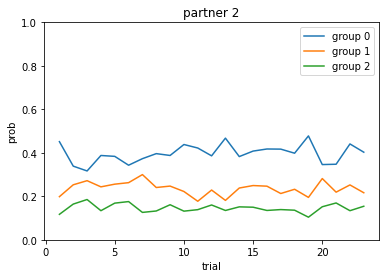

In [14]:
p2g0 = df_post_22.loc[(df_post_22['partnerID'] == 'partner2') & (df_post_22['partner'] == 'group0')]
p2g1 = df_post_22.loc[(df_post_22['partnerID'] == 'partner2') & (df_post_22['partner'] == 'group1')]
p2g2 = df_post_22.loc[(df_post_22['partnerID'] == 'partner2') & (df_post_22['partner'] == 'group2')]

plt.figure()
plt.plot(p2g0['trialNum'], p2g0['val'], label='group 0') 
plt.plot(p2g1['trialNum'], p2g1['val'], label='group 1') 
plt.plot(p2g2['trialNum'], p2g2['val'], label='group 2') 
plt.title('partner 2')
plt.xlabel('trial')
plt.ylabel('prob')
plt.ylim((0, 1))
plt.legend()
plt.show()

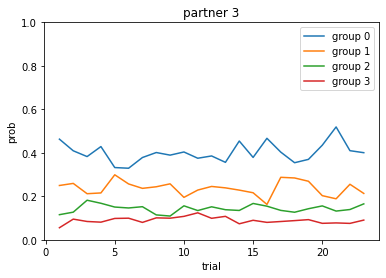

In [15]:
p3g0 = df_post_22.loc[(df_post_22['partnerID'] == 'partner3') & (df_post_22['partner'] == 'group0')]
p3g1 = df_post_22.loc[(df_post_22['partnerID'] == 'partner3') & (df_post_22['partner'] == 'group1')]
p3g2 = df_post_22.loc[(df_post_22['partnerID'] == 'partner3') & (df_post_22['partner'] == 'group2')]
p3g3 = df_post_22.loc[(df_post_22['partnerID'] == 'partner3') & (df_post_22['partner'] == 'group3')]

plt.figure()
plt.plot(p3g0['trialNum'], p3g0['val'], label='group 0') 
plt.plot(p3g1['trialNum'], p3g1['val'], label='group 1') 
plt.plot(p3g2['trialNum'], p3g2['val'], label='group 2') 
plt.plot(p3g3['trialNum'], p3g3['val'], label='group 3') 
plt.title('partner 3')
plt.xlabel('trial')
plt.ylabel('prob')
plt.ylim((0, 1))
plt.legend()
plt.show()

## remaking irina's plots

In [120]:
df = pd.read_csv('../output/old/listener0.1_clean.csv')
# df_posttest = pd.read_csv('../output/nonparam/meaningTest_FlexibleListenerGroups5.csv')

# Remove white space from column labels
df.columns = df.columns.str.replace(' ', '')
# df_posttest.columns = df_posttest.columns.str.replace(' ', '')

In [357]:
df

,model,speakerAlpha,listenerAlpha,discountFactor,guessingEpsilon,iterationNum,trialNum,condition,partnerID,partner,val
0,Listener,5,5,0.9,0.01,99,1,1,partner1,group1,1.000000
1,Listener,5,5,0.9,0.01,99,1,1,partner2,group1,0.491085
2,Listener,5,5,0.9,0.01,99,1,1,partner2,group2,0.508915
3,Listener,5,5,0.9,0.01,99,1,1,partner3,group1,0.503774
4,Listener,5,5,0.9,0.01,99,1,1,partner3,group2,0.496226
...,...,...,...,...,...,...,...,...,...,...,...
163,Listener,5,5,0.9,0.01,99,24,4,partner2,group2,0.791878
164,Listener,5,5,0.9,0.01,99,24,4,partner3,group1,0.838671
165,Listener,5,5,0.9,0.01,99,24,4,partner3,group2,0.161329
166,Listener,5,5,0.9,0.01,99,24,4,partner4,group1,0.160149


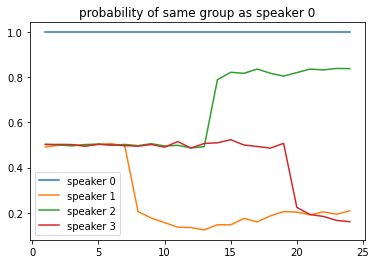

In [463]:

df_p1g1 = df.loc[(df['partnerID'] == 'partner1') & (df['partner'] == 'group1')]
df_p2g1 = df.loc[(df['partnerID'] == 'partner2') & (df['partner'] == 'group1')]
df_p3g1 = df.loc[(df['partnerID'] == 'partner3') & (df['partner'] == 'group1')]
df_p4g1 = df.loc[(df['partnerID'] == 'partner4') & (df['partner'] == 'group1')]

plt.figure()
plt.title('probability of same group as speaker 0')
plt.plot(df_p1g1['trialNum'], df_p1g1['val'], label="speaker 0")
plt.plot(df_p2g1['trialNum'], df_p2g1['val'], label="speaker 1")
plt.plot(df_p3g1['trialNum'], df_p3g1['val'], label="speaker 2")
plt.plot(df_p4g1['trialNum'], df_p4g1['val'], label="speaker 3")
plt.legend()